# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [32]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


name = []
number = []
lat = []
lon = []
maxt = []
hum = []
clds = []
ws = []
country = []
date = []


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
index=0
set = 1
for city in cities:

# Create limit on API calls
    index +=1
    if index == 51:
        index = 0
        time.sleep(60)
        set += 1

    response = requests.get(query_url + city).json()

#  Append resutls to list placeholders that were created above.   
    try:
        number.append(response['id'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxt.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        clds.append(response['clouds']['all'])
        ws.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        print(f"Processing Record {index} of set {set} for: {city}, with city number {response['id']}")

# Alerts of when a city isn't found
    except KeyError:
        print("City not found. Skipping...")
        pass
    
print('Data Retrieval Complete')
        
    


Processing Record 1 of set 1 for: ribeira grande, with city number 3372707
City not found. Skipping...
Processing Record 3 of set 1 for: severo-kurilsk, with city number 2121385
Processing Record 4 of set 1 for: isangel, with city number 2136825
Processing Record 5 of set 1 for: san patricio, with city number 4726521
Processing Record 6 of set 1 for: hun, with city number 2216645
Processing Record 7 of set 1 for: ushuaia, with city number 3833367
City not found. Skipping...
Processing Record 9 of set 1 for: college, with city number 5859699
Processing Record 10 of set 1 for: santa cruz, with city number 3904906
City not found. Skipping...
Processing Record 12 of set 1 for: khatanga, with city number 2022572
Processing Record 13 of set 1 for: shahreza, with city number 417594
Processing Record 14 of set 1 for: carnarvon, with city number 2074865
Processing Record 15 of set 1 for: avarua, with city number 4035715
Processing Record 16 of set 1 for: ojinaga, with city number 3994469
City n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Creates a dataframe out of the results from the above cell

weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lon,
    'Max Temp': maxt,
    'Humidity': hum,
    'Cloudiness': clds,
    'Wind Speed': ws,
    'Country': country,
    'Date': date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,15.22,67,40,2.57,PT,1644782521
1,Severo-Kuril'sk,50.6789,156.1250,-5.60,70,36,4.57,RU,1644782652
2,Isangel,-19.5500,169.2667,26.06,94,40,2.06,VU,1644782396
3,San Patricio,28.0170,-97.5169,18.42,22,0,3.10,US,1644782652
4,Hūn,29.1268,15.9477,13.21,38,0,4.36,LY,1644782562
...,...,...,...,...,...,...,...,...,...
551,Wufeng,27.4500,104.8333,0.55,94,31,0.47,CN,1644783455
552,Harper,4.3750,-7.7169,25.83,83,54,3.41,LR,1644783455
553,Nador,35.1740,-2.9287,12.14,76,0,1.03,MA,1644783455
554,Gimli,50.6336,-96.9907,-18.82,97,100,7.63,CA,1644783213


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

humidity_check = weather_data.describe()

if humidity_check.iloc[7, 3] > 100:

    clean_data = weather_data.drop(weather_data[weather_data['Humidity'] > 100].index, inplace=False)

else:

    clean_data = weather_data


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

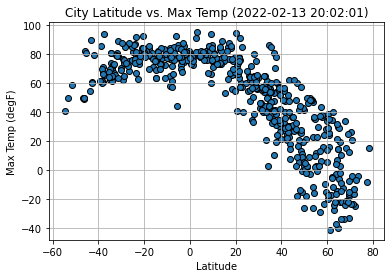

In [37]:
x_axis = clean_data['Lat']
y_axis = clean_data['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

plt.scatter(x_axis, y_axis, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (degF)')
plt.title(f'City Latitude vs. Max Temp ({date[0]})')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

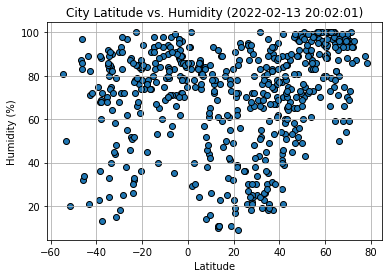

In [38]:
x_axis = clean_data['Lat']
y_axis = clean_data['Humidity']
date = pd.to_datetime(clean_data['Date'], unit = 's')

plt.scatter(x_axis, y_axis, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date[0]})')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

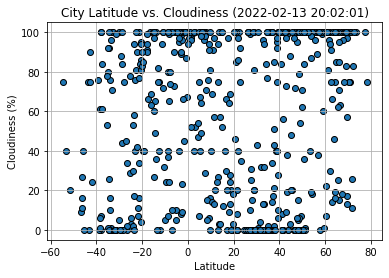

In [39]:
x_axis = clean_data['Lat']
y_axis = clean_data['Cloudiness']
date = pd.to_datetime(clean_data['Date'], unit = 's')

plt.scatter(x_axis, y_axis, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date[0]})')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

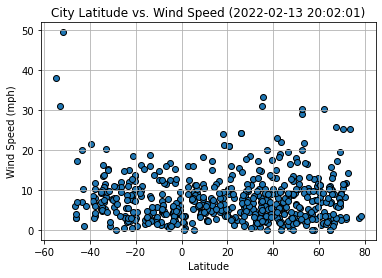

In [40]:
x_axis = clean_data['Lat']
#Convet from m/s to mph
y_axis = clean_data['Wind Speed'] * 2.23694
date = pd.to_datetime(clean_data['Date'], unit = 's')

plt.scatter(x_axis, y_axis, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date[0]})')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      39.355829
1      21.858766
3      54.461148
4      52.864542
6       1.461687
         ...    
551    55.276859
552    88.473545
553    44.164781
554    21.923937
555    49.318432
Name: Lat, Length: 374, dtype: float64
y = -1.44x +94.77
The r-value is: 0.7300757659438314


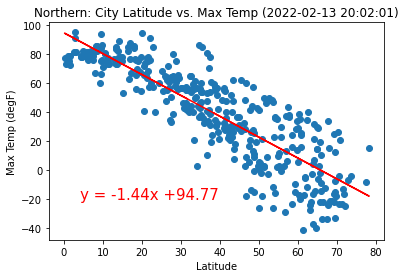

In [41]:
northern = clean_data.drop(clean_data[clean_data['Lat'] < 0].index, inplace=False)

x_axis = northern['Lat']
y_axis = northern['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (degF)')
plt.title(f'Northern: City Latitude vs. Max Temp ({date[0]})')
plt.annotate(line_eq,(4,-20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

2      75.115970
5      64.533144
7      75.641358
10     73.519779
11     74.618262
         ...    
537    69.612570
539    80.228330
543    74.295433
545    74.480490
549    78.443420
Name: Lat, Length: 182, dtype: float64
y = 0.3x +80.99
The r-value is: 0.1807800273858555


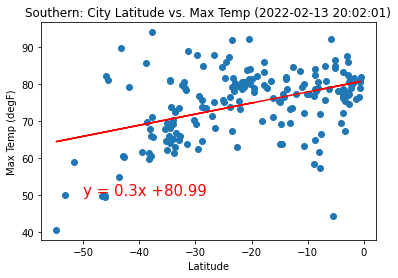

In [42]:
southern = clean_data.drop(clean_data[clean_data['Lat'] >= 0].index, inplace=False)

x_axis = southern['Lat']
y_axis = southern['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (degF)')
plt.title(f'Southern: City Latitude vs. Max Temp ({date[0]})')
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      70.480928
1      76.685757
3      65.124262
4      65.690453
6      83.918994
         ...    
551    64.834994
552    53.062747
553    68.775572
554    76.662647
555    66.947979
Name: Lat, Length: 374, dtype: float64
y = 0.51x +50.83
The r-value is: 0.1690180760840256


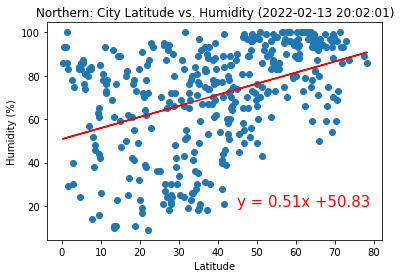

In [43]:
x_axis = northern['Lat']
y_axis = northern['Humidity']

date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern: City Latitude vs. Humidity ({date[0]})')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

2      75.115970
5      64.533144
7      75.641358
10     73.519779
11     74.618262
         ...    
537    69.612570
539    80.228330
543    74.295433
545    74.480490
549    78.443420
Name: Lat, Length: 182, dtype: float64
y = 0.3x +80.99
The r-value is: 0.1807800273858555


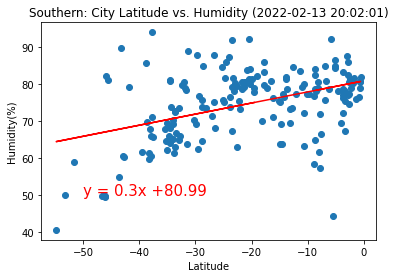

In [44]:
x_axis = southern['Lat']
y_axis = southern['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'Southern: City Latitude vs. Humidity ({date[0]})')
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      57.709258
1      63.131397
3      53.028293
4      53.523063
6      69.452217
         ...    
551    52.775514
552    42.488242
553    56.219019
554    63.111201
555    54.621962
Name: Lat, Length: 374, dtype: float64
y = 0.45x +40.54
The r-value is: 0.04387573202042544


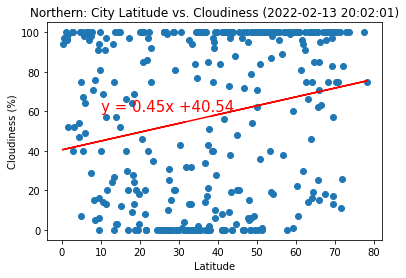

In [45]:
x_axis = northern['Lat']
y_axis = northern['Cloudiness']

date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern: City Latitude vs. Cloudiness ({date[0]})')
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

2      58.053768
5      21.643734
7      59.861358
10     52.562102
11     56.341412
         ...    
537    39.119414
539    75.642758
543    55.230725
545    55.867410
549    69.501805
Name: Lat, Length: 182, dtype: float64
y = 1.03x +78.25
The r-value is: 0.13015116193580278


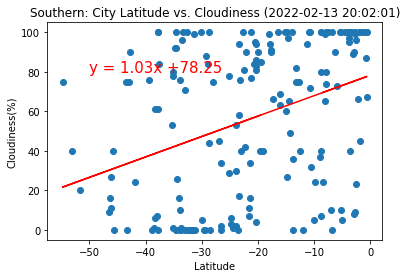

In [46]:
x_axis = southern['Lat']
y_axis = southern['Cloudiness']
date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'Southern: City Latitude vs. Cloudiness ({date[0]})')
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      3.507444
1      3.578404
3      3.446184
4      3.452659
6      3.661125
         ...   
551    3.442876
552    3.308246
553    3.487941
554    3.578140
555    3.467041
Name: Lat, Length: 374, dtype: float64
y = 0.01x +3.28
The r-value is: 0.0018976422434750975


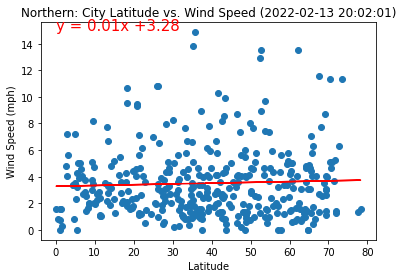

In [47]:
x_axis = northern['Lat']
y_axis = northern['Wind Speed']

date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern: City Latitude vs. Wind Speed ({date[0]})')
plt.annotate(line_eq,(0, 15),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

2      3.385656
5      5.872782
7      3.262182
10     3.760785
11     3.502625
         ...   
537    4.679039
539    2.184174
543    3.578495
545    3.535004
549    2.603655
Name: Lat, Length: 182, dtype: float64
y = -0.07x +2.01
The r-value is: 0.11532882479083095


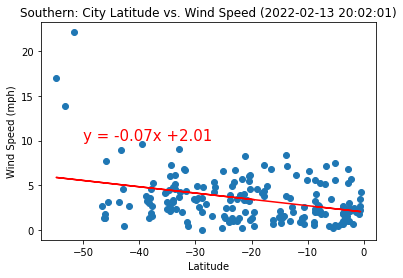

In [48]:
x_axis = southern['Lat']
y_axis = southern['Wind Speed']

date = pd.to_datetime(clean_data['Date'], unit = 's')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern: City Latitude vs. Wind Speed ({date[0]})')
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
plt.show()

In [49]:
clean_data.to_csv('output_data/cities.csv', encoding='utf-8', index=False)

In [ ]:
# Data Analysis:

# 1.)  None of the linear regression models are reliable enough to model any of the relationships in this exercise since the highest r^2 value
#     among all charts was only 0.73.
#      I suspect there are too many other variables that influence cloudiness, wind speed, temperature, & humidity other than latitude alone.

# 2.) However, in the northern hemisphere, there is a much stronger correlation between temperature and latitude, with an r^2 of 0.73
#     compared to the southern hemisphere, that only has an r^2 value of 0.18.  With that said, you could say with greater certainty that
#     latitude relates to temperature much more stongly in the northern hemisphere than compared to the southern hemisphere.

# 3.) Additionally, for the first chart titled, "Latitiude vs. Max Temp" I would feel confident in saying that the farther you move away 
#     from -20/+20 degress latitude in either direction, the max temperature decreases.  This makes sense because its common knowledge that
#    in general, the hottest temperatures on earth are experienced within -20/+20 degress of the equator.